<a href="https://colab.research.google.com/github/mkdelavina/Data-Analytics-Portfolio/blob/main/colab/Employee_Attrition_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse Employee Attrition

## Task


Uncover the factors that lead to employee attrition.

1. Have a look at the variables, understand what they are.
2. Which variables are associated with attrition? For which groups of employees
does this association hold (`Department`, `JobLevel`, etc.)? Formulate several hypotheses.
3. Explore each hypothesis.
    - Make plots and/or compute statistics.
    - Write a short conclusion, refer to the justifications you found in the data.

## Dataset

_Source: https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition_

_Check this other site for additional documentation about the variables: https://www.kaggle.com/datasets/thedevastator/employee-attrition-and-factors/data_

This is a fictional data set created by IBM data scientists. It contains data about employees in a company.

Encoding of some of the columns:

```
Education
1 'Below College'
2 'College'
3 'Bachelor'
4 'Master'
5 'Doctor'

EnvironmentSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobInvolvement
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

JobSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

PerformanceRating
1 'Low'
2 'Good'
3 'Excellent'
4 'Outstanding'

RelationshipSatisfaction
1 'Low'
2 'Medium'
3 'High'
4 'Very High'

WorkLifeBalance
1 'Bad'
2 'Good'
3 'Better'
4 'Best'
```

## Analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# From https://drive.google.com/file/d/1TGVkYpXg9efkuh-N3UCaahBtCQhs65vy/view
df = pd.read_csv(
    "https://drive.google.com/uc?id=1TGVkYpXg9efkuh-N3UCaahBtCQhs65vy",
    true_values=["Yes"],
    false_values=["No"],
)
df.shape

(1470, 35)

In [ ]:
df.dtypes

,0
Age,int64
Attrition,bool
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df[['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate']].head(3)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate
0,41,True,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94
1,49,False,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61
2,37,True,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92


In [ ]:
df[['JobInvolvement','JobLevel','JobRole','JobSatisfaction','MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating']].head(3)

,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating
0,3,2,Sales Executive,4,Single,5993,19479,8,Y,True,11,3
1,2,2,Research Scientist,2,Married,5130,24907,1,Y,False,23,4
2,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,True,15,3


In [ ]:
df[['RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']].head(3)

,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,80,0,8,0,1,6,4,0,5
1,4,80,1,10,3,3,10,7,1,7
2,2,80,0,7,3,3,0,0,0,0


In [ ]:
# Correlation Coeficient Range [-1 - 1]

#-1 is perfectly negative Correlation
#1 is perfect positive correlation

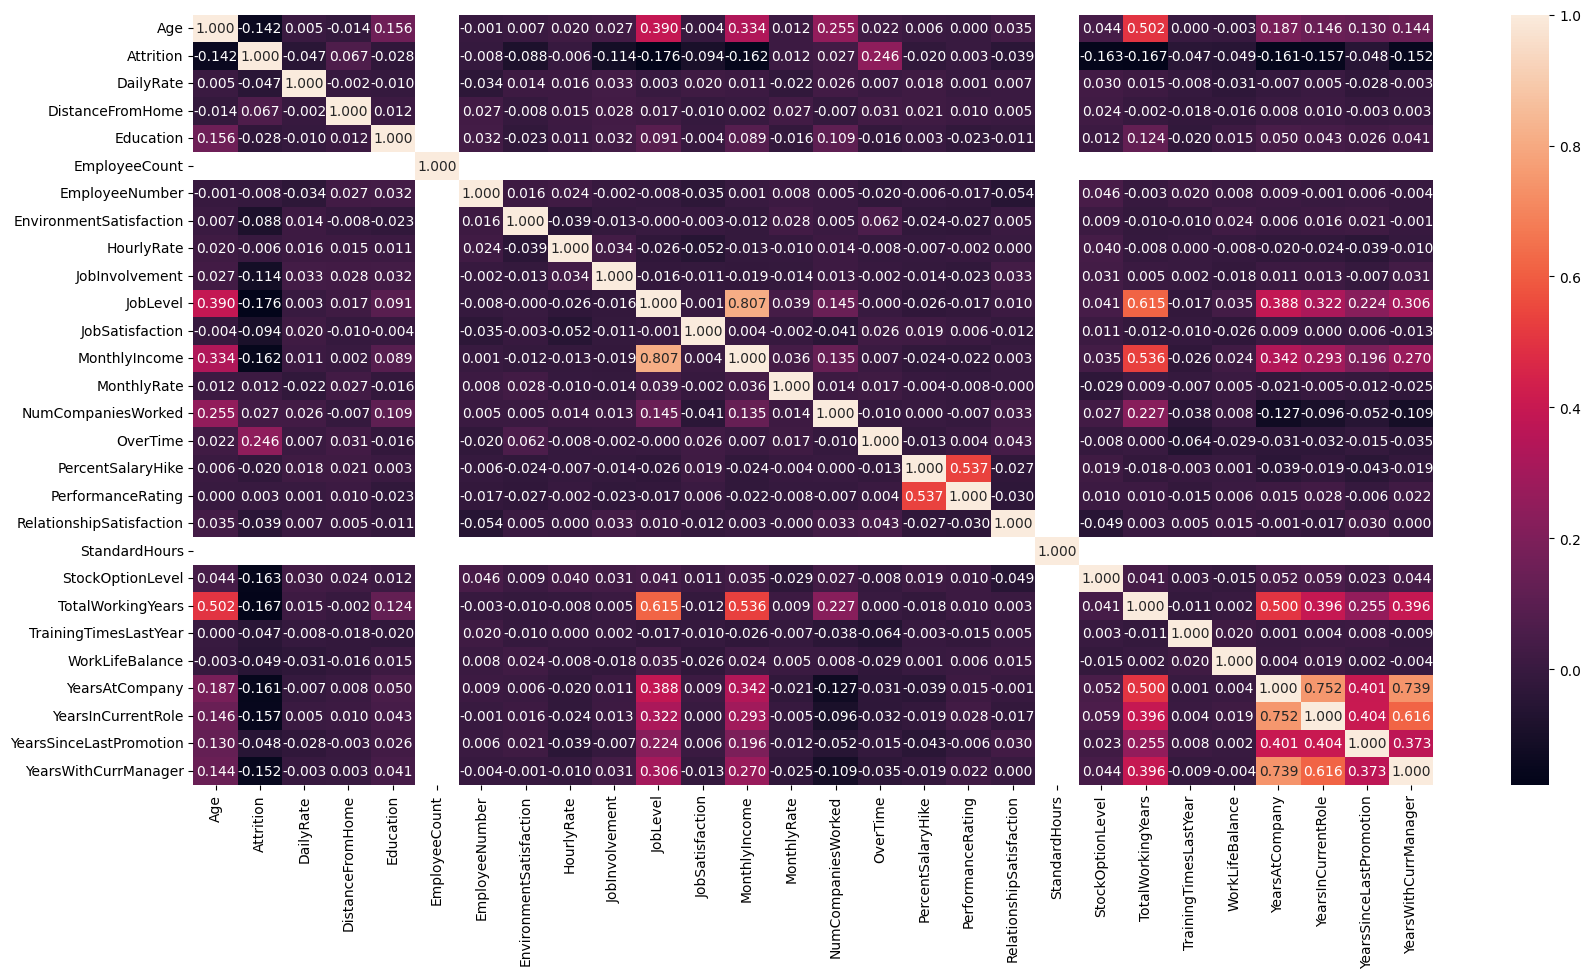

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,10))
df_subset_non_string = df.select_dtypes(exclude="object")
# df_subset_numeric_only = df.select_dtypes(include="number") # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html
sns.heatmap(df_subset_non_string.corr(method="kendall"), annot=True, fmt=".3f", ax=ax);

## Hypothesis 1: Overtime Work
**Hypothesis:** Employees who work overtime have higher possibility of attrition<br>
**Conlusion:**
*   Hypothesis is true. For the whole company, the attrition rate of those who did overtime is 30.5% while for those who did not do overtime, it is only 10.4%.
*   This pattern is more evident among the following groups of people (with overtime vs no overtime):
 *   Job Level: Employees with job level 1 at 52.6% vs 15.8%
 *   Gender: Employees who are single at 49.6% vs 16.2%
 *   Job Role: <br>
      *   Laboratory Technitian at 50% vs 15.7% <br>
      *   Sales Representatives at 67% vs 28.8%

(0.0, 1.0)

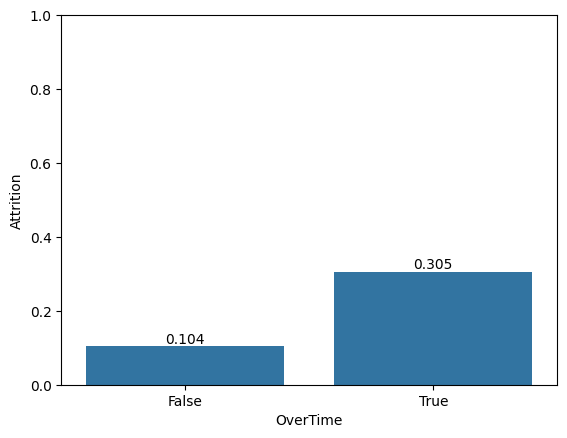

In [ ]:
#Attrition rate of those with OverTime VS without OverTime
ax=sns.barplot(data=df[["Attrition","OverTime"]], x="OverTime", y="Attrition",errorbar=None)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='black',
                xytext=(0, 5), textcoords='offset points')
plt.ylim(0, 1)

(0.0, 1.0)

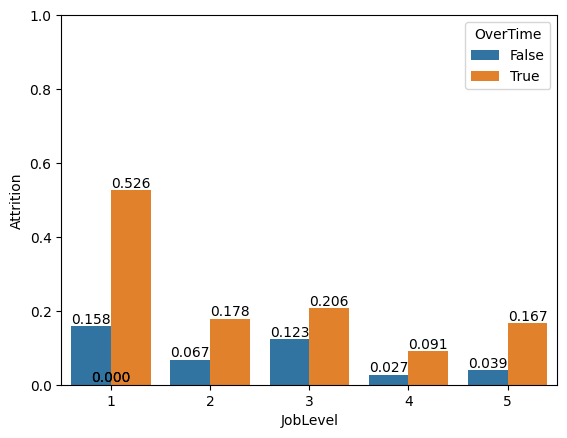

In [ ]:
#Attrition and Overtime for each JobLevel
ax = sns.barplot(data=df[["JobLevel","Attrition","OverTime"]], x="JobLevel", y="Attrition", hue="OverTime",errorbar=None)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='black',
                xytext=(0, 5), textcoords='offset points')
plt.ylim(0, 1)

In [ ]:
#getting the rate difference
ottrue=df[df["OverTime"]==True].groupby("JobLevel")["Attrition"].mean()
otfalse=df[df["OverTime"]==False].groupby("JobLevel")["Attrition"].mean()
ottrue-otfalse

,Attrition
JobLevel,
1,0.368018
2,0.111072
3,0.083769
4,0.063512
5,0.127451


(0.0, 1.0)

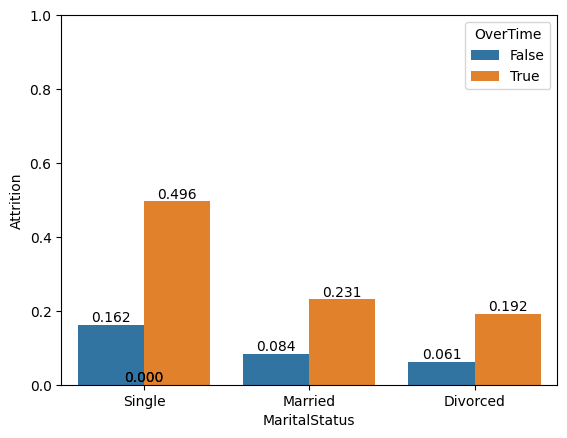

In [ ]:
#Attrition and Overtime for each Marital Status
ax = sns.barplot(data=df[["MaritalStatus","Attrition","OverTime"]], x="MaritalStatus", y="Attrition", hue="OverTime",errorbar=None)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='black',
                xytext=(0, 5), textcoords='offset points')
plt.ylim(0, 1)

In [ ]:
#getting the rate difference
ottrue=df[df["OverTime"]==True].groupby("MaritalStatus")["Attrition"].mean()
otfalse=df[df["OverTime"]==False].groupby("MaritalStatus")["Attrition"].mean()
ottrue-otfalse

,Attrition
MaritalStatus,
Divorced,0.130516
Married,0.146994
Single,0.333941


(0.0, 1.0)

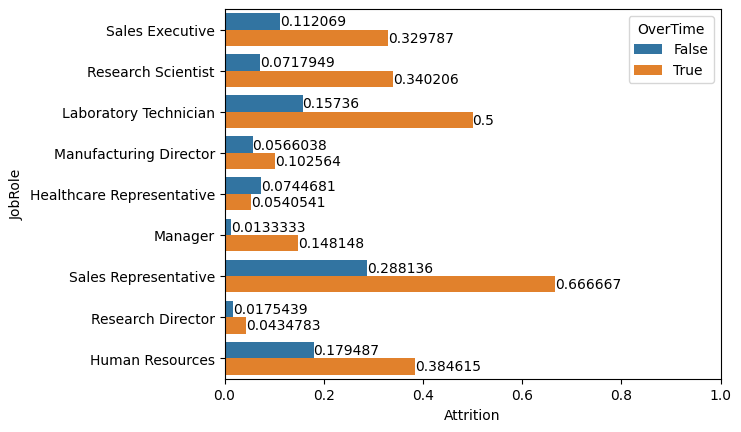

In [ ]:
#Attrition and Overtime for each Job Role
ax = sns.barplot(data=df[["JobRole","Attrition","OverTime"]], y="JobRole", x="Attrition", hue="OverTime",errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
plt.xlim(0, 1)

In [ ]:
#getting the rate difference
ottrue=df[df["OverTime"]==True].groupby("JobRole")["Attrition"].mean()
otfalse=df[df["OverTime"]==False].groupby("JobRole")["Attrition"].mean()
ottrue-otfalse

,Attrition
JobRole,
Healthcare Representative,-0.020414
Human Resources,0.205128
Laboratory Technician,0.342640
Manager,0.134815
Manufacturing Director,0.045960
Research Director,0.025934
Research Scientist,0.268411
Sales Executive,0.217718
Sales Representative,0.378531


(0.0, 1.0)

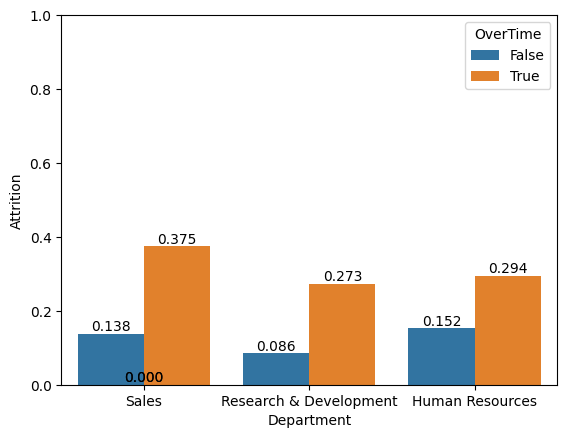

In [ ]:
#Attrition and Overtime for each department
ax = sns.barplot(data=df[["Department","Attrition","OverTime"]], x="Department", y="Attrition", hue="OverTime",errorbar=None)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='black',
                xytext=(0, 5), textcoords='offset points')
plt.ylim(0, 1)


In [ ]:
#getting the rate difference
ottrue=df[df["OverTime"]==True].groupby("Department")["Attrition"].mean()
otfalse=df[df["OverTime"]==False].groupby("Department")["Attrition"].mean()
ottrue-otfalse

,Attrition
Department,
Human Resources,0.141944
Research & Development,0.187555
Sales,0.236635


(0.0, 1.0)

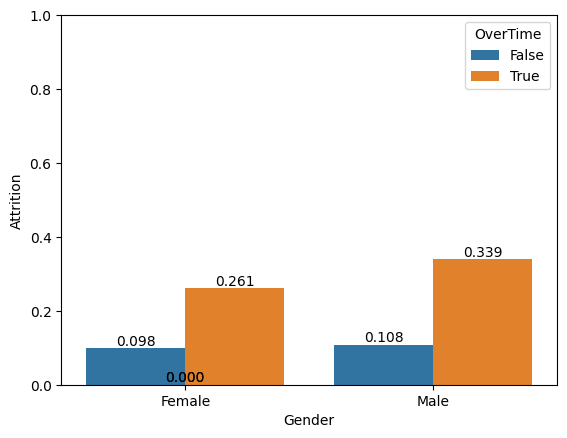

In [ ]:
#Attrition and Overtime for each Gender
ax = sns.barplot(data=df[["Gender","Attrition","OverTime"]], x="Gender", y="Attrition", hue="OverTime",errorbar=None)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='black',
                xytext=(0, 5), textcoords='offset points')
plt.ylim(0, 1)

In [ ]:
#getting the rate difference
ottrue=df[df["OverTime"]==True].groupby("Gender")["Attrition"].mean()
otfalse=df[df["OverTime"]==False].groupby("Gender")["Attrition"].mean()
ottrue-otfalse

,Attrition
Gender,
Female,0.163072
Male,0.230624


(0.0, 1.0)

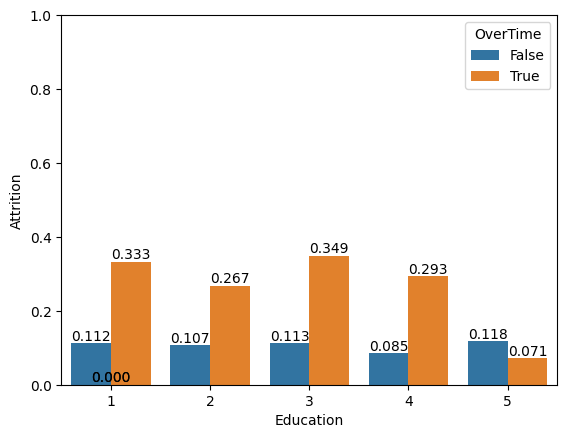

In [ ]:
#Attrition and Overtime for each Education
ax = sns.barplot(data=df[["Education","Attrition","OverTime"]], x="Education", y="Attrition", hue="OverTime",errorbar=None)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='black',
                xytext=(0, 5), textcoords='offset points')
plt.ylim(0, 1)

In [ ]:
#getting the rate difference
ottrue=df[df["OverTime"]==True].groupby("Education")["Attrition"].mean()
otfalse=df[df["OverTime"]==False].groupby("Education")["Attrition"].mean()
ottrue-otfalse

,Attrition
Education,
1,0.221264
2,0.160299
3,0.236639
4,0.207997
5,-0.046218


## Hypothesis 2: Number of Companies Worked
**Hypothesis 2:** Employees with higher number of previous companies have higher attrition rate compared to those who worked for fewer companies. <br>
**Conclusion:** For the whole company, employees with 5-9 previous companies have higher attrition rate at 21.75% while those with 0-4 previous companies have an attrition rate of 14.63%. <br>
*   This is more evident the in following groups of people:<br>
 *   Job role:
     *   Sales Executive  with 16.3% difference in attrition rates.<br>
     *   Research Scientist with 13.23% difference in attrition rates.

In [ ]:
df["NumCompaniesWorkedGroup"] = ""

In [ ]:
for i in range(len(df)):
  if df.loc[i,"NumCompaniesWorked"] >= 0 and df.loc[i,"NumCompaniesWorked"] <=4:
      df.loc[i,"NumCompaniesWorkedGroup"] = "0-4"
  elif df.loc[i,"NumCompaniesWorked"] >= 5 and df.loc[i,"NumCompaniesWorked"] <=9:
      df.loc[i,"NumCompaniesWorkedGroup"] = "5-9"

In [ ]:
newdf=df.groupby("NumCompaniesWorkedGroup")["Attrition"].mean()
newdf

,Attrition
NumCompaniesWorkedGroup,
0-4,0.146299
5-9,0.217532


(0.0, 0.5)

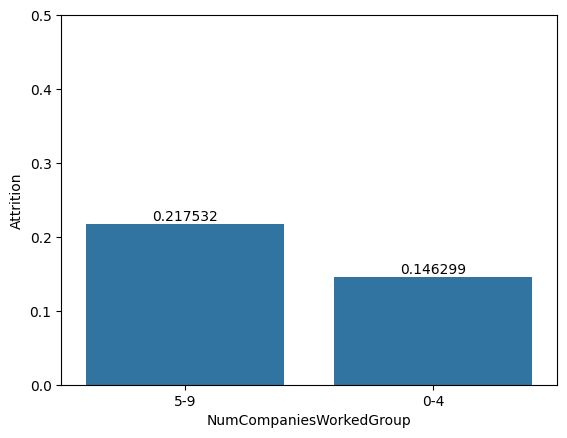

In [ ]:
#Attrition rate by number of companies worked
ax=sns.barplot(data=df, x="NumCompaniesWorkedGroup", y="Attrition",errorbar=None, )
ax.bar_label(ax.containers[0])
plt.ylim(0, .5)


(0.0, 1.0)

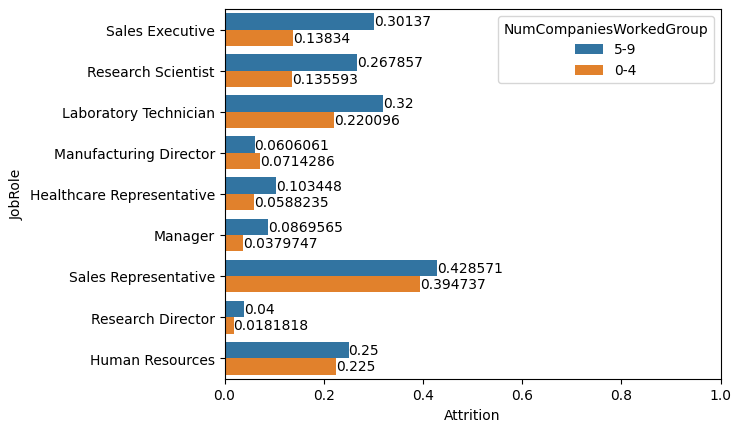

In [ ]:
#Number of Companies worked and attrition by Job role
ax = sns.barplot(data=df, y="JobRole", x="Attrition", hue="NumCompaniesWorkedGroup",errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
plt.xlim(0, 1)

In [ ]:
#getting the rate difference
morecomp=df[df["NumCompaniesWorkedGroup"]=="5-9"].groupby("JobRole")["Attrition"].mean()
fewcomp=df[df["NumCompaniesWorkedGroup"]=="0-4"].groupby("JobRole")["Attrition"].mean()
morecomp-fewcomp

,Attrition
JobRole,
Healthcare Representative,0.044625
Human Resources,0.025000
Laboratory Technician,0.099904
Manager,0.048982
Manufacturing Director,-0.010823
Research Director,0.021818
Research Scientist,0.132264
Sales Executive,0.163030
Sales Representative,0.033835


(0.0, 1.0)

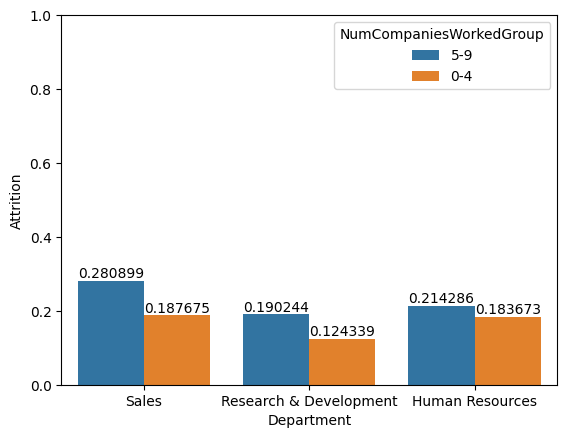

In [ ]:
#Number of Companies worked and attrition by Department
ax = sns.barplot(data=df, x="Department", y="Attrition", hue="NumCompaniesWorkedGroup",errorbar=None)
for container in ax.containers:
    ax.bar_label(container)
plt.ylim(0, 1)

In [ ]:
#getting the rate difference
morecomp=df[df["NumCompaniesWorkedGroup"]=="5-9"].groupby("Department")["Attrition"].mean()
fewcomp=df[df["NumCompaniesWorkedGroup"]=="0-4"].groupby("Department")["Attrition"].mean()
morecomp-fewcomp

,Attrition
Department,
Human Resources,0.030612
Research & Development,0.065905
Sales,0.093224


(0.0, 1.0)

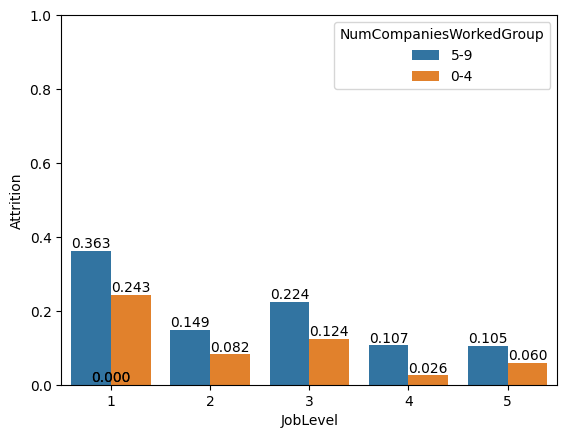

In [ ]:
#Number of Companies worked and attrition by Job level
ax = sns.barplot(data=df, x="JobLevel", y="Attrition", hue="NumCompaniesWorkedGroup",errorbar=None)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='black',
                xytext=(0, 5), textcoords='offset points')
plt.ylim(0, 1)

In [ ]:
#getting the rate difference
morecomp=df[df["NumCompaniesWorkedGroup"]=="5-9"].groupby("JobLevel")["Attrition"].mean()
fewcomp=df[df["NumCompaniesWorkedGroup"]=="0-4"].groupby("JobLevel")["Attrition"].mean()
morecomp-fewcomp

,Attrition
JobLevel,
1,0.119275
2,0.066436
3,0.100229
4,0.081502
5,0.045263


(0.0, 1.0)

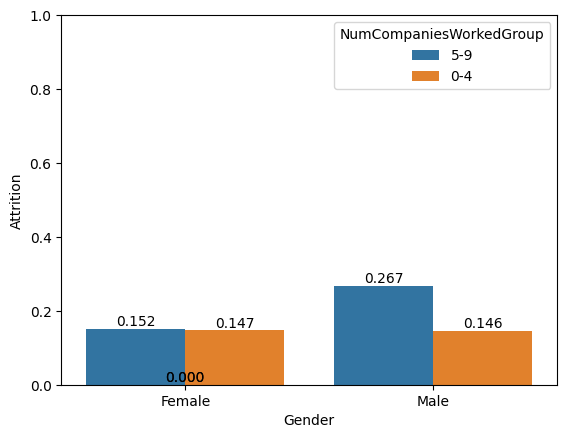

In [ ]:
#Number of Companies worked and attrition by Gender
ax = sns.barplot(data=df, x="Gender", y="Attrition", hue="NumCompaniesWorkedGroup",errorbar=None)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='black',
                xytext=(0, 5), textcoords='offset points')
plt.ylim(0, 1)

In [ ]:
#getting the rate difference
morecomp=df[df["NumCompaniesWorkedGroup"]=="5-9"].groupby("Gender")["Attrition"].mean()
fewcomp=df[df["NumCompaniesWorkedGroup"]=="0-4"].groupby("Gender")["Attrition"].mean()
morecomp-fewcomp

,Attrition
Gender,
Female,0.004585
Male,0.121153


(0.0, 1.0)

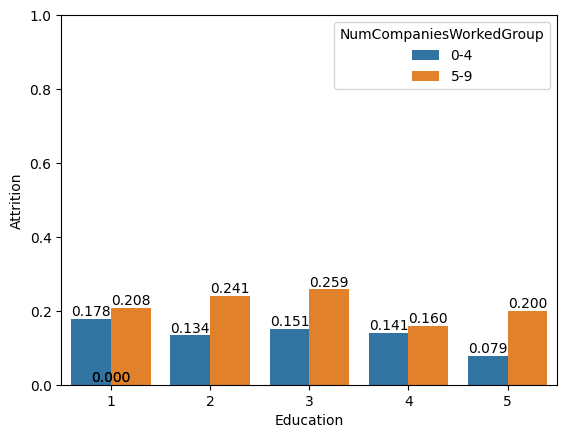

In [ ]:
#Number of Companies worked and attrition by Education
ax = sns.barplot(data=df, x="Education", y="Attrition", hue="NumCompaniesWorkedGroup",errorbar=None)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='black',
                xytext=(0, 5), textcoords='offset points')
plt.ylim(0, 1)

In [ ]:
#getting the rate difference
morecomp=df[df["NumCompaniesWorkedGroup"]=="5-9"].groupby("Education")["Attrition"].mean()
fewcomp=df[df["NumCompaniesWorkedGroup"]=="0-4"].groupby("Education")["Attrition"].mean()
morecomp-fewcomp

,Attrition
Education,
1,0.030251
2,0.107451
3,0.107305
4,0.019060
5,0.121053


(0.0, 1.0)

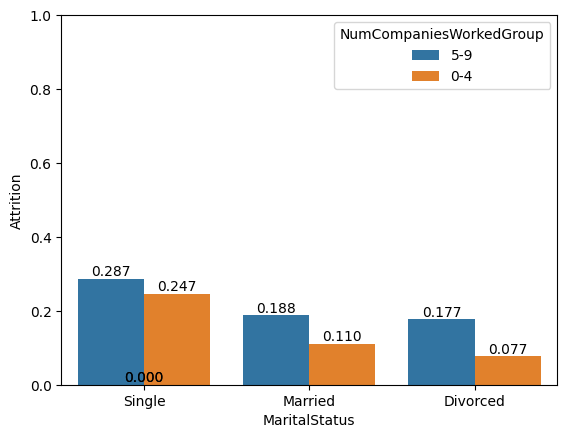

In [ ]:
#Number of Companies worked and attrition by Marital Status
ax = sns.barplot(data=df, x="MaritalStatus", y="Attrition", hue="NumCompaniesWorkedGroup",errorbar=None)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='black',
                xytext=(0, 5), textcoords='offset points')
plt.ylim(0, 1)

In [ ]:
#getting the rate difference
morecomp=df[df["NumCompaniesWorkedGroup"]=="5-9"].groupby("MaritalStatus")["Attrition"].mean()
fewcomp=df[df["NumCompaniesWorkedGroup"]=="0-4"].groupby("MaritalStatus")["Attrition"].mean()
morecomp-fewcomp

,Attrition
MaritalStatus,
Divorced,0.100602
Married,0.077408
Single,0.040516


## Hypothesis 3: DistanceFromHome
**Hypothesis 3:** Employees who live farther have higher attrition rate<br>
**Conclusion:** For the whole company, they hypothesis holds true. It is also generally true when only comparing those who live less than 10km vs those who live more than 10km. But comparing between those who live 11-20km away and those who live 21-30km away, the pattern is inconsistent. The distance is not directly proportional to the attrition rate, but I think there is a certain threshold, maybe 10k, which employees find acceptable.
*   The group of employees that show this more evidently are:
  *   Department: Human Resources
  *   Job Role: Human Resources
  *   Job Level: 3


In [ ]:
df["DistanceFromHomeGroup"] = ""

In [ ]:
for i in range(len(df)):
  if df.loc[i,"DistanceFromHome"] >= 1 and df.loc[i,"DistanceFromHome"] <=10:
      df.loc[i,"DistanceFromHomeGroup"] = "1-10"
  elif df.loc[i,"DistanceFromHome"] >= 11 and df.loc[i,"DistanceFromHome"] <=20:
      df.loc[i,"DistanceFromHomeGroup"] = "11-20"
  elif df.loc[i,"DistanceFromHome"] >= 21 and df.loc[i,"DistanceFromHome"] <=30:
      df.loc[i,"DistanceFromHomeGroup"] = "21-30"

In [ ]:
newdf=df.groupby("DistanceFromHomeGroup")["Attrition"].mean()
newdf

,Attrition
DistanceFromHomeGroup,
1-10,0.140351
11-20,0.200000
21-30,0.220588


<Axes: xlabel='DistanceFromHomeGroup', ylabel='Attrition'>

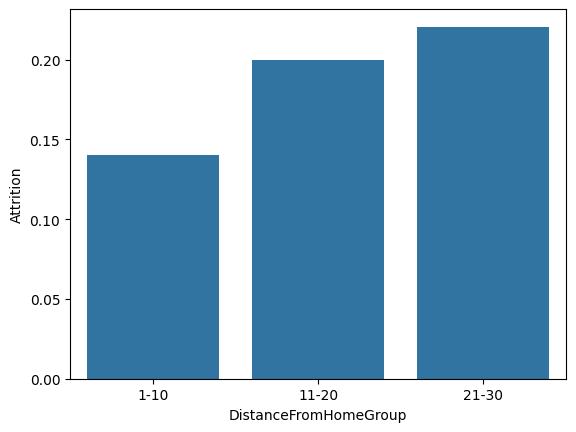

In [ ]:
sorted_distgroup = sorted(df['DistanceFromHomeGroup'].unique())
sns.barplot(data=df, x="DistanceFromHomeGroup", y="Attrition",errorbar=None, order=sorted_distgroup )


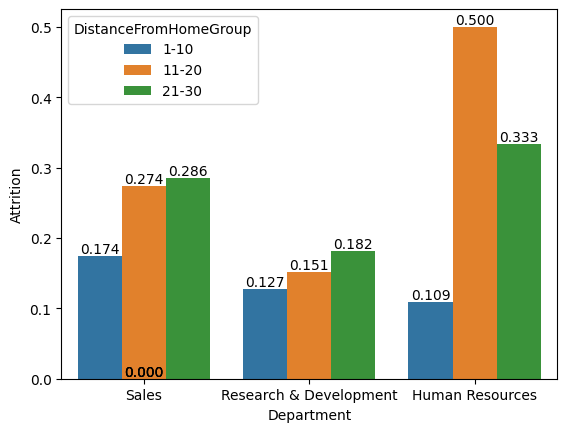

In [ ]:
#Distance from home and attrition by Department
ax = sns.barplot(data=df, x="Department", y="Attrition", hue="DistanceFromHomeGroup",errorbar=None, hue_order=sorted_distgroup)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='black',
                xytext=(0, 5), textcoords='offset points')




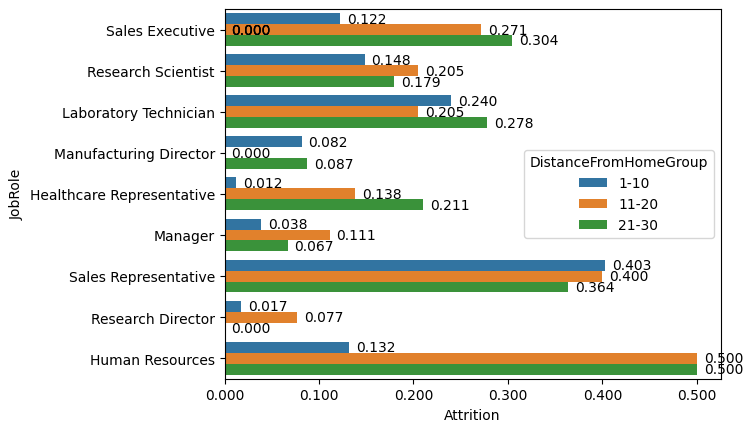

In [ ]:
#Distance from home and attrition by JobRole
ax = sns.barplot(data=df, y="JobRole", x="Attrition", hue="DistanceFromHomeGroup",errorbar=None, hue_order=sorted_distgroup)

# Annotate the bars with y-values limited to 3 decimal places
for p in ax.patches:
    ax.annotate(f'{p.get_width():.3f}',  # Format the width of each bar to 3 decimal places
                (p.get_width(), p.get_y() + p.get_height() / 2.),  # Position the annotation
                ha='left', va='center', xytext=(5, 0), textcoords='offset points')

# Format the x-axis ticks to show 3 decimal places
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.3f}'))


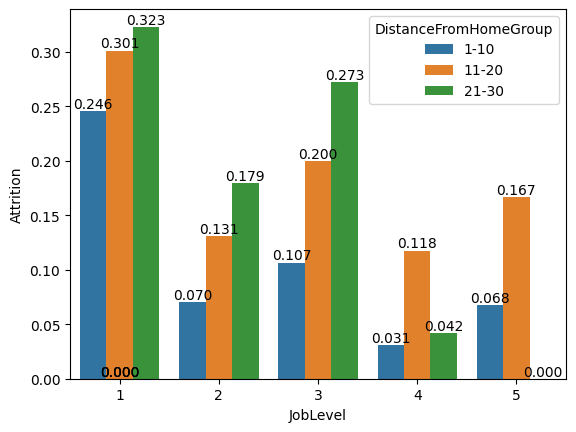

In [ ]:
#Distance from home and attrition by JobLevel
ax = sns.barplot(data=df, x="JobLevel", y="Attrition", hue="DistanceFromHomeGroup",errorbar=None, hue_order=sorted_distgroup)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='black',
                xytext=(0, 5), textcoords='offset points')


(0.0, 0.5)

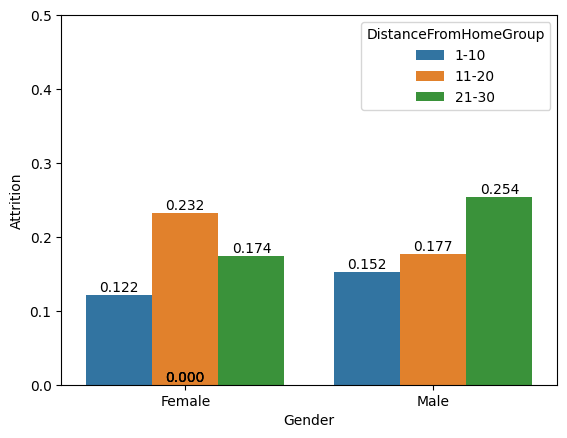

In [ ]:
#Distance from home and attrition by Gender
ax = sns.barplot(data=df, x="Gender", y="Attrition", hue="DistanceFromHomeGroup",errorbar=None, hue_order=sorted_distgroup)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='black',
                xytext=(0, 5), textcoords='offset points')
plt.ylim([0,.5])

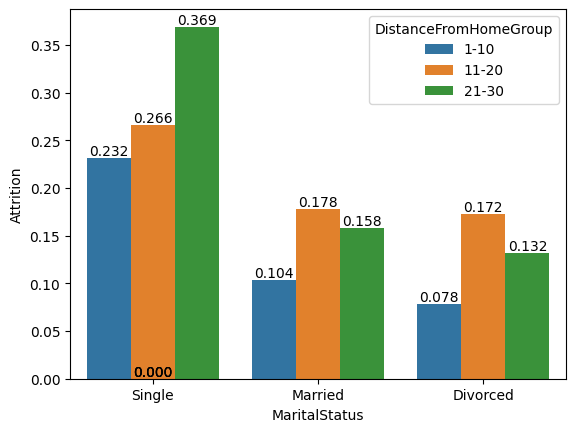

In [ ]:
#Distance from home and attrition by MaritalStatus
ax = sns.barplot(data=df, x="MaritalStatus", y="Attrition", hue="DistanceFromHomeGroup",errorbar=None, hue_order=sorted_distgroup)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.3f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', color='black',
                xytext=(0, 5), textcoords='offset points')


(0.0, 0.5)

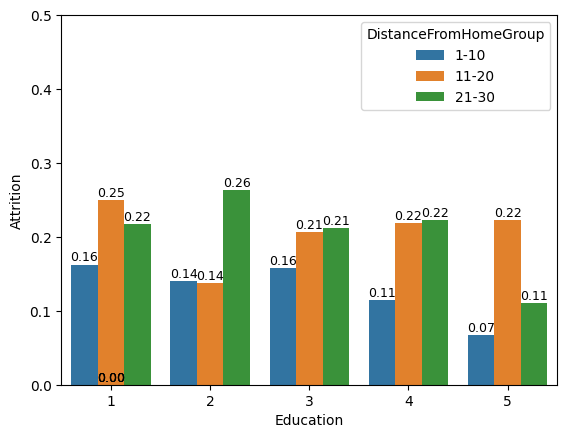

In [ ]:
#Distance from home and attrition by Education
ax = sns.barplot(data=df, x="Education", y="Attrition", hue="DistanceFromHomeGroup",errorbar=None, hue_order=sorted_distgroup)
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=9,color='black',
                xytext=(0, 5), textcoords='offset points')
plt.ylim([0,.5])

## Hypothesis 4: Monthly Rate
**Hypothesis** Low Monthly Rate increases attrition
Hypothesis <br>
**Conclusion** Though it might be intuitive to assume that low monthly rates would make employees leave and high monthly rates will make employees stay, this is not what the data shows. For the whole company, the highest attrition is among those with monthly rates between 25k to 30k at 20.8% followed by those with 10k-15k at 18.5%. <br>Those with rates between 5k-10k have lower attrition rate than those earning 15k-25k.

In [ ]:
df["MonthlyRateBucket"]=0

In [ ]:

#min: 1000
#max: 30000

for i in range(len(df)):
  if df.loc[i,"MonthlyRate"] >= 1000 and df.loc[i,"MonthlyRate"] < 5000:
      df.loc[i,"MonthlyRateBucket"] = 5000
  elif df.loc[i,"MonthlyRate"] >= 5000 and df.loc[i,"MonthlyRate"] < 10000:
      df.loc[i,"MonthlyRateBucket"] = 10000
  elif df.loc[i,"MonthlyRate"] >= 10000 and df.loc[i,"MonthlyRate"] < 15000:
      df.loc[i,"MonthlyRateBucket"] = 15000
  elif df.loc[i,"MonthlyRate"] >= 15000 and df.loc[i,"MonthlyRate"] < 20000:
      df.loc[i,"MonthlyRateBucket"] = 20000
  elif df.loc[i,"MonthlyRate"] >= 20000 and df.loc[i,"MonthlyRate"] < 25000:
      df.loc[i,"MonthlyRateBucket"] = 25000
  elif df.loc[i,"MonthlyRate"] >= 25000 and df.loc[i,"MonthlyRate"] < 30000:
      df.loc[i,"MonthlyRateBucket"] = 30000
newdf = df.groupby("MonthlyRateBucket")["Attrition"].mean().reset_index()
newdf

,MonthlyRateBucket,Attrition
0,5000,0.175439
1,10000,0.132911
2,15000,0.185315
3,20000,0.147157
4,25000,0.158940
5,30000,0.208333


(0.0, 0.5)

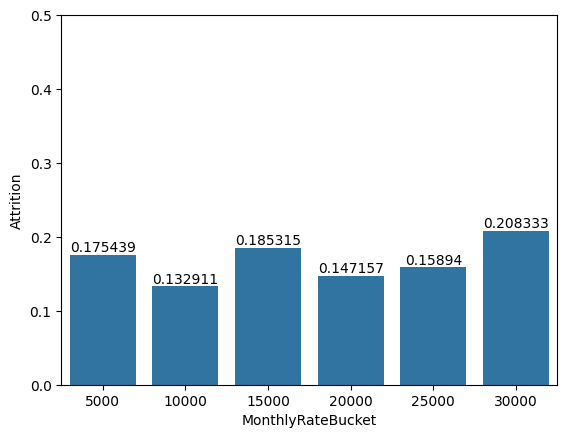

In [ ]:
#Attrition rate of those with OverTime VS without OverTime
ax=sns.barplot(data=newdf, x="MonthlyRateBucket", y="Attrition",errorbar=None, )
ax.bar_label(ax.containers[0])
plt.ylim(0, .5)
